In [19]:
!pip install pandas numpy scikit-learn sqlalchemy psycopg2-binary matplotlib seaborn joblib python-dotenv


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Retail Sales Analysis
**Tech Stack:** Python, Scikit-learn, PostgreSQL, Tableau  
**Goal:** Predict monthly sales with <8% MAPE and build interactive dashboards

### 1.Data Loading and inspection

In [39]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
# from dotenv import load_dotenv
import os

In [40]:
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [31]:
sales = pd.read_csv(r"C:\Users\ASUS\Desktop\sales data\SalesData.csv", header=0)

In [32]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [34]:
sales

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [ ]:
# sales.set_index('Customer Id', inplace=True)

In [26]:
sales.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [30]:
print("Missing Values:")
print(sales.isna().sum())

Missing Values:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [42]:
print("\nDuplicate Rows:", sales.duplicated().sum())


Duplicate Rows: 0


### 2.Data preprocessing

In [43]:
# Convert date columns to datetime

sales['Order Date'] = pd.to_datetime(sales['Order Date'], format='%d/%m/%Y')
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'], format='%d/%m/%Y')

In [45]:
# Extract year and month from Order Date

sales['Order Year'] = sales['Order Date'].dt.year
sales['Order Month'] = sales['Order Date'].dt.month_name()
sales['Month Number'] = sales['Order Date'].dt.month

In [49]:
# Create a profit column (assuming 20% profit margin for this analysis)
sales['Profit'] = sales['Sales'] * 0.2

### 3. Exploratory Data Analysis (EDA)

In [52]:
print("Sales Statistics:")
print(sales['Sales'].describe())

Sales Statistics:
count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64


In [56]:
# Top 10 products by sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Sales:")
print(top_products)


Top 10 Products by Sales:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


In [57]:
# Sales by category
category_sales = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
print("\nSales by Category:")
print(category_sales)


Sales by Category:
                       Sales        Profit
Category                                  
Technology       827455.8730  165491.17460
Furniture        728658.5757  145731.71514
Office Supplies  705422.3340  141084.46680


### 4. Data Visualization

In [66]:
# Set figure size for all plots
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

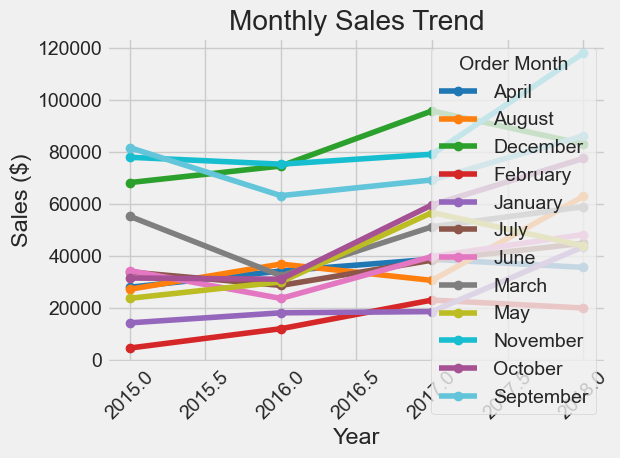

In [68]:
    # Monthly sales trend
    monthly_sales = sales.groupby(['Order Year', 'Order Month'])['Sales'].sum().unstack()
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#a55194', '#63c5da'  # 12 colors for 12 months
]
    monthly_sales.plot(kind='line',color=colors, marker='o')
    plt.title('Monthly Sales Trend')
    plt.ylabel('Sales ($)')
    plt.xlabel('Year')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

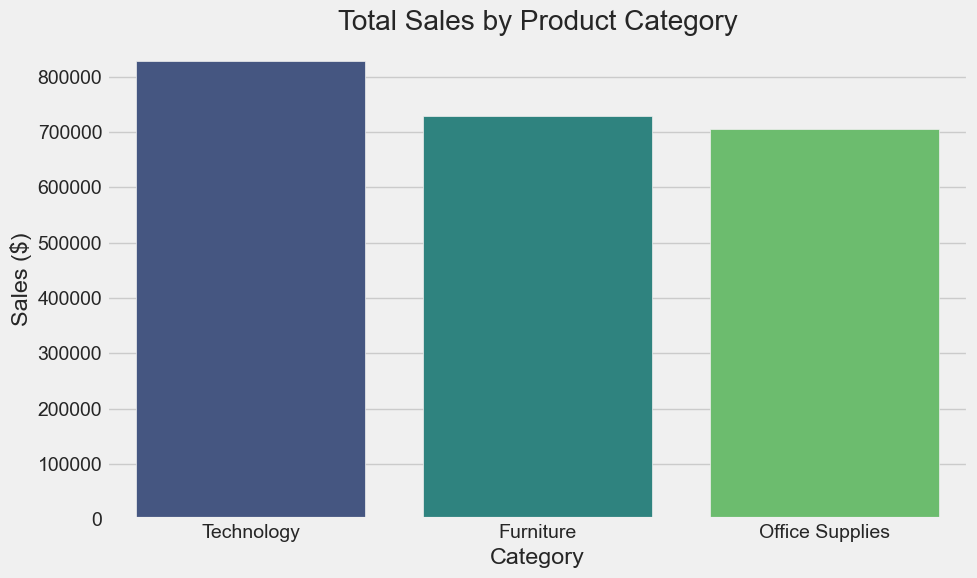

In [70]:
# Sales by category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales['Sales'], palette='viridis')
plt.title('Total Sales by Product Category')
plt.ylabel('Sales ($)')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

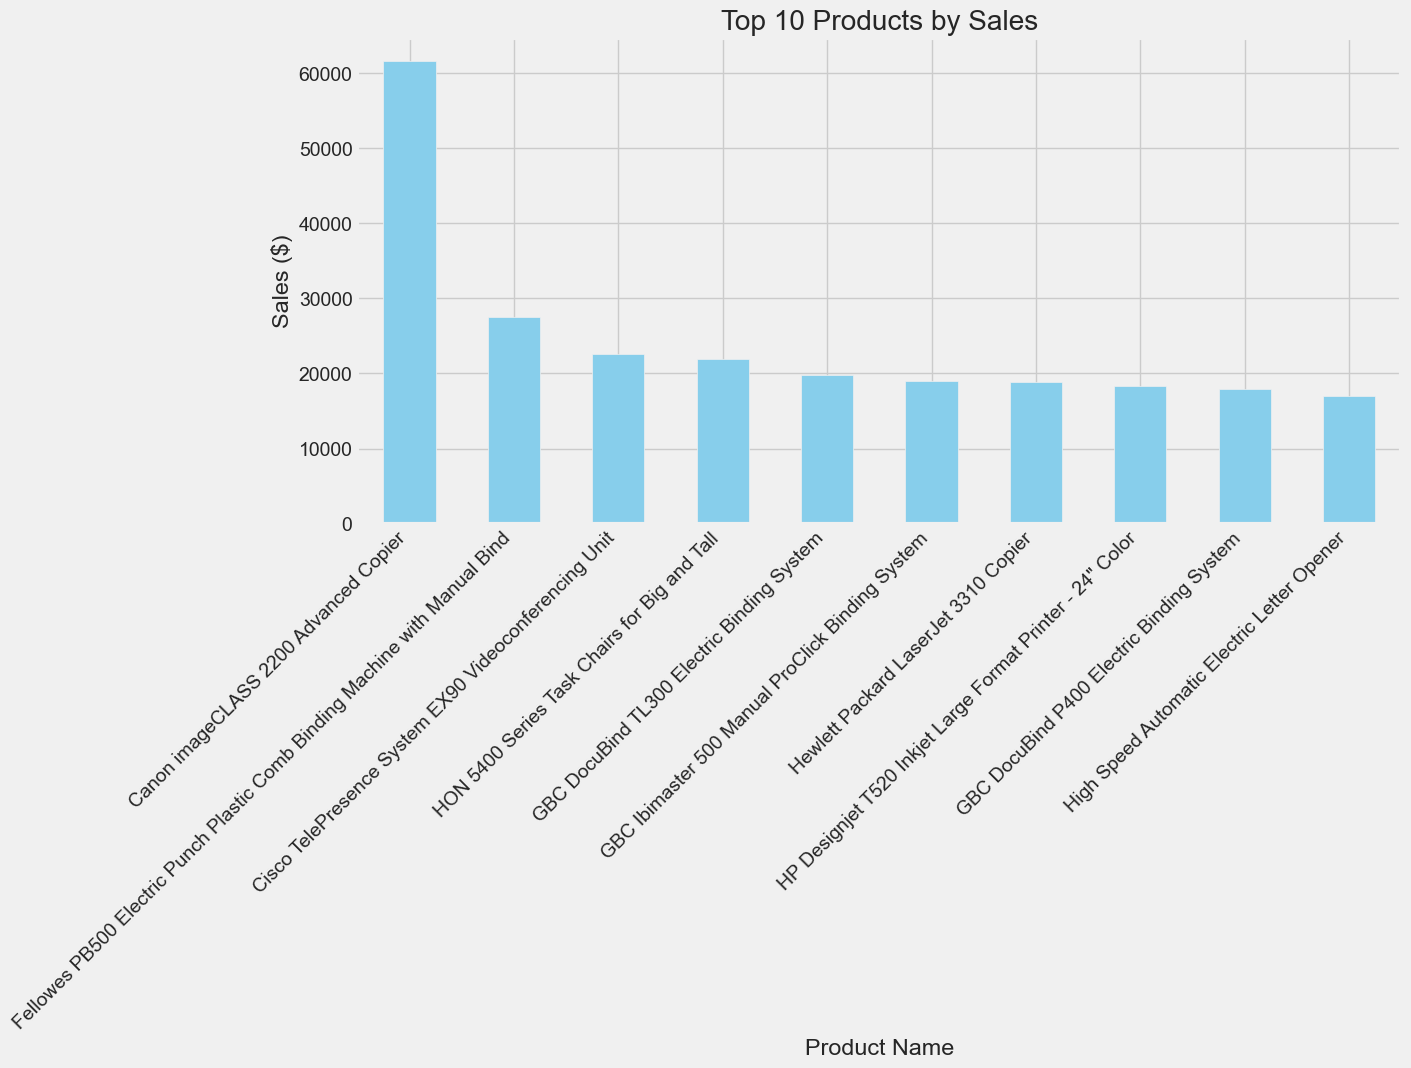

In [72]:
# Top 10 products visualization
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Sales')
plt.ylabel('Sales ($)')
plt.xlabel('Product Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

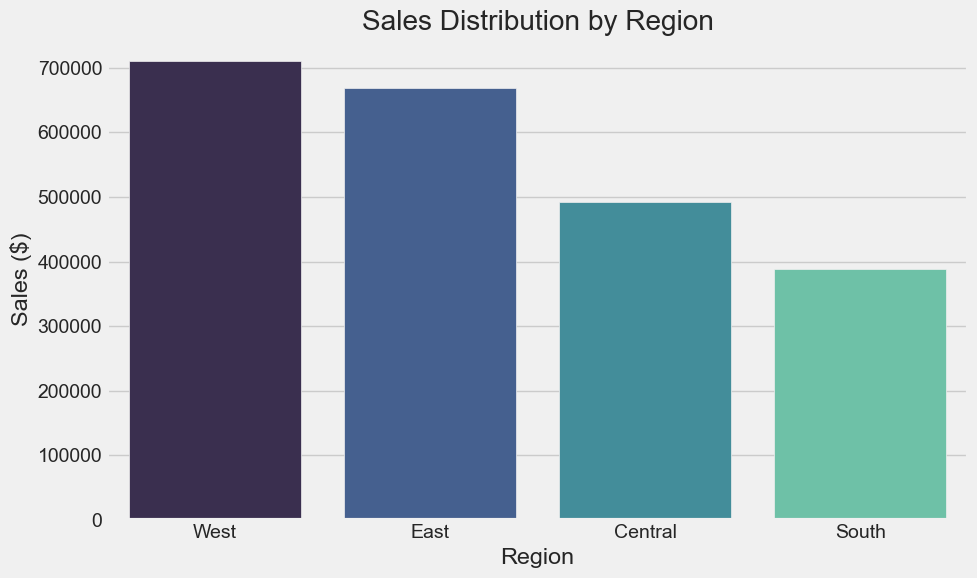

In [74]:
# Sales distribution by region
plt.figure(figsize=(10, 6))
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values, palette='mako')
plt.title('Sales Distribution by Region')
plt.ylabel('Sales ($)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

### 5. Customer Analysis

In [76]:
# Top customers by sales
top_customers = sales.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Sales:")
print(top_customers)


Top 10 Customers by Sales:
Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


In [78]:
# Customer segments analysis
segment_analysis = df.groupby('Segment')[['Sales', 'Profit']].sum()
print("\nSales and Profit by Customer Segment:")
print(segment_analysis)


Sales and Profit by Customer Segment:
                    Sales        Profit
Segment                                
Consumer     1.148061e+06  229612.10620
Corporate    6.884941e+05  137698.81496
Home Office  4.249822e+05   84996.43538


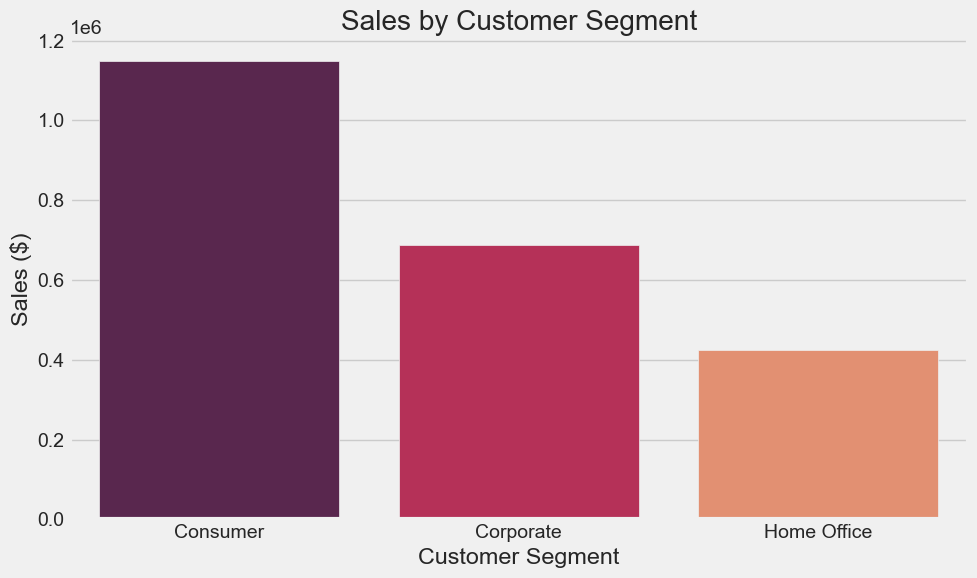

In [80]:
# Customer segment visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_analysis.index, y=segment_analysis['Sales'], palette='rocket')
plt.title('Sales by Customer Segment')
plt.ylabel('Sales ($)')
plt.xlabel('Customer Segment')
plt.tight_layout()
plt.show()

### 6. Time Series Analysis

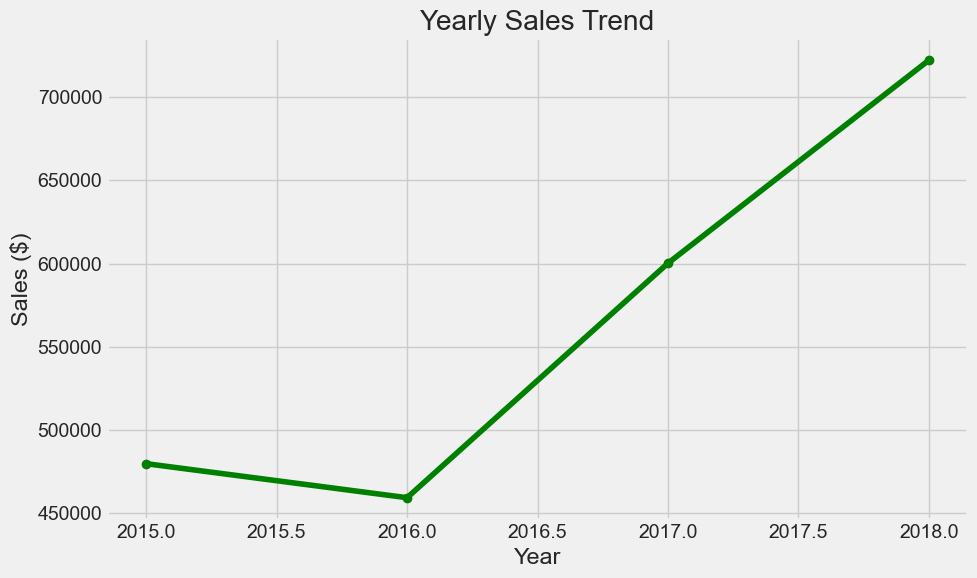

In [83]:
# Yearly sales trend
yearly_sales = sales.groupby('Order Year')['Sales'].sum()
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='line', marker='o', color='green')
plt.title('Yearly Sales Trend')
plt.ylabel('Sales ($)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

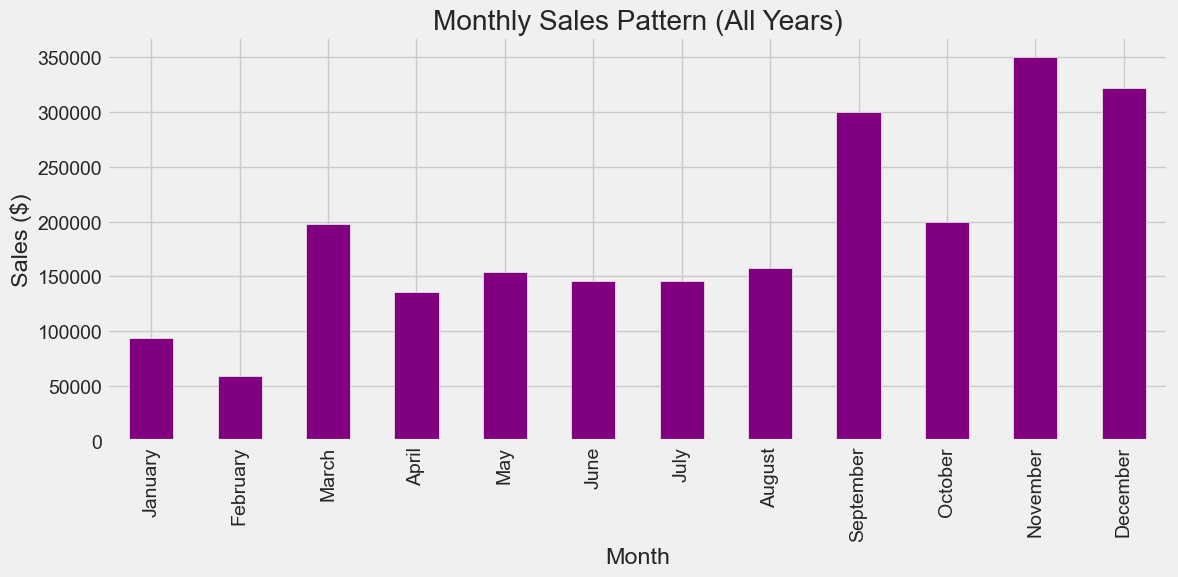

In [86]:
# Monthly sales pattern (across all years)
monthly_pattern = sales.groupby('Order Month')['Sales'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.figure(figsize=(12, 6))
monthly_pattern.plot(kind='bar', color='purple')
plt.title('Monthly Sales Pattern (All Years)')
plt.ylabel('Sales ($)')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

### 7. Product Performance Analysis

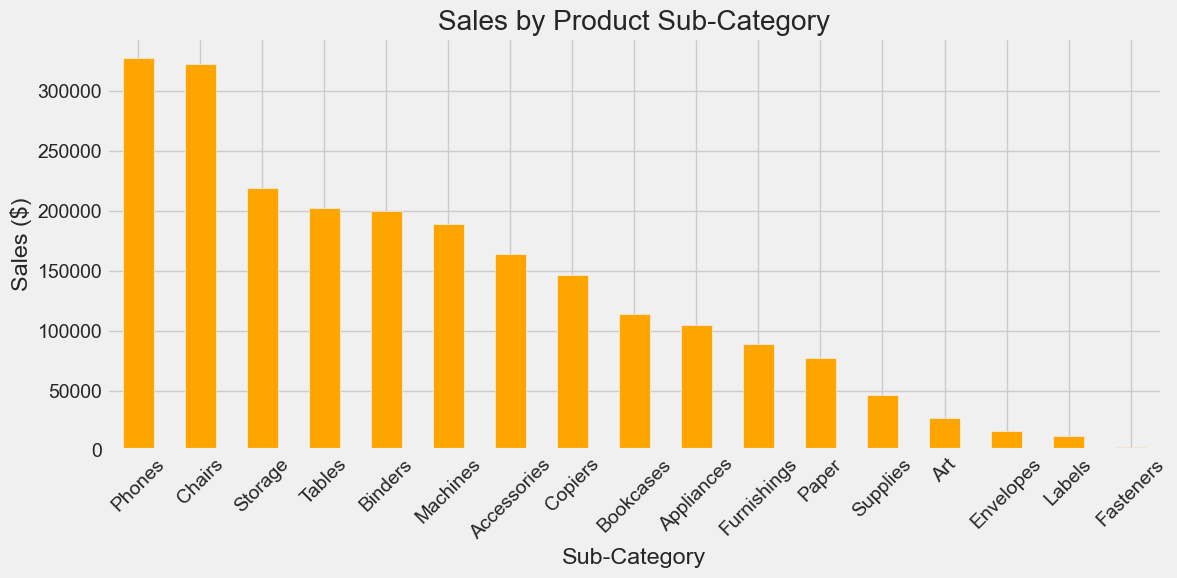

In [88]:
# Product sub-category analysis
subcategory_sales = sales.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
subcategory_sales.plot(kind='bar', color='orange')
plt.title('Sales by Product Sub-Category')
plt.ylabel('Sales ($)')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

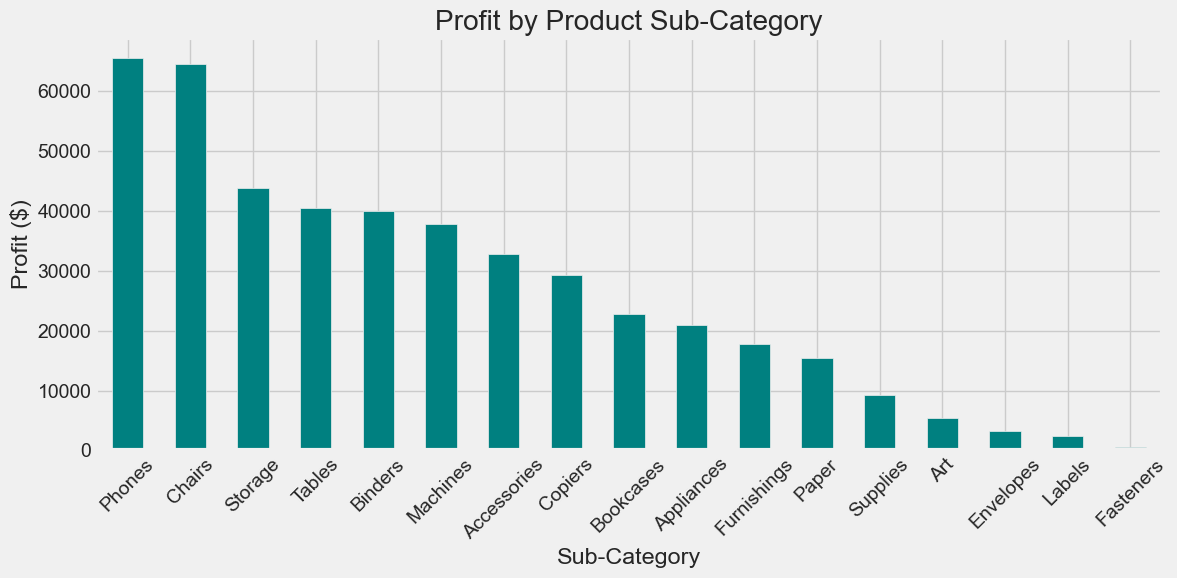

In [91]:
# Profit margin by sub-category (assuming 20% profit)
subcategory_profit = sales.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
subcategory_profit.plot(kind='bar', color='teal')
plt.title('Profit by Product Sub-Category')
plt.ylabel('Profit ($)')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 8. Geographic Analysis

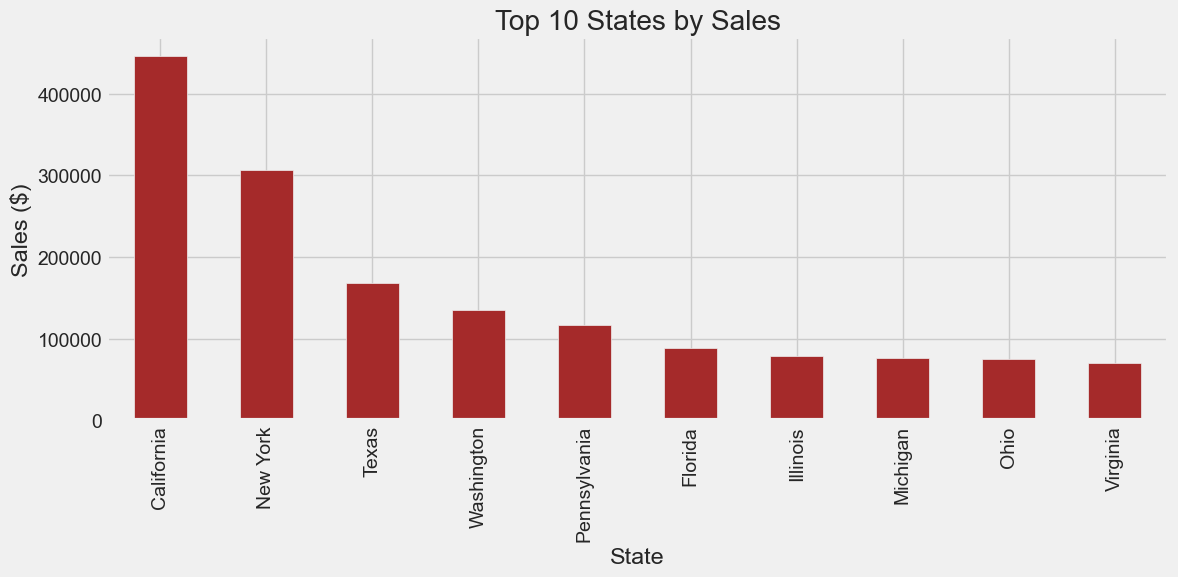

In [94]:
# Top states by sales
state_sales = sales.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
state_sales.plot(kind='bar', color='brown')
plt.title('Top 10 States by Sales')
plt.ylabel('Sales ($)')
plt.xlabel('State')
plt.tight_layout()
plt.show()

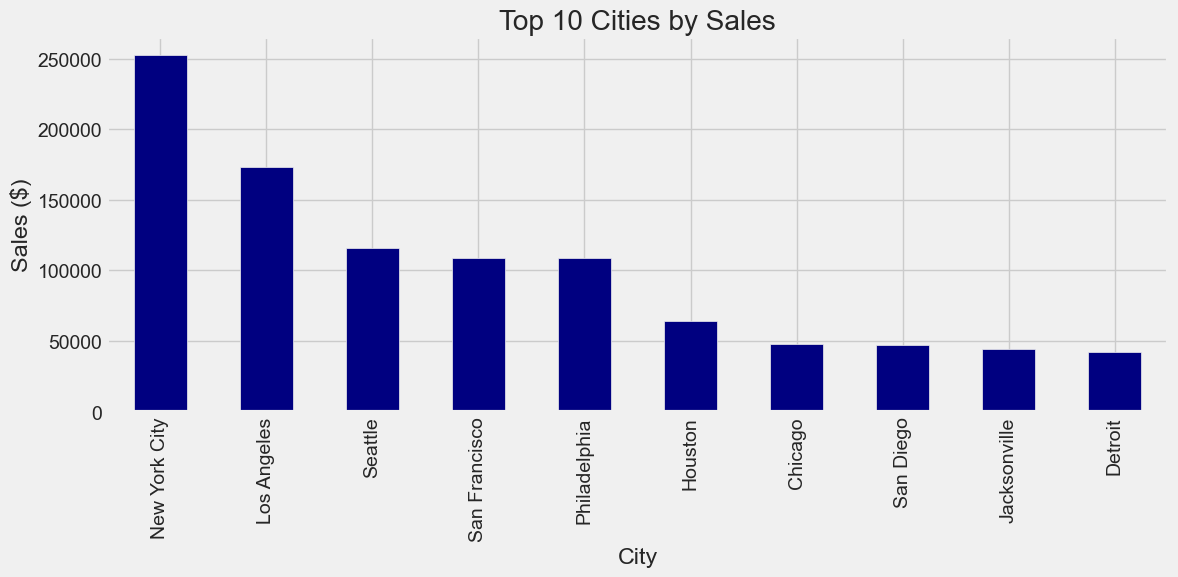

In [95]:
# Top cities by sales
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar', color='navy')
plt.title('Top 10 Cities by Sales')
plt.ylabel('Sales ($)')
plt.xlabel('City')
plt.tight_layout()
plt.show()


### 9. Shipping Analysis

In [97]:
# Shipping mode analysis
shipping_analysis = df.groupby('Ship Mode')[['Sales', 'Profit']].sum()
print("\nSales and Profit by Shipping Mode:")
print(shipping_analysis)


Sales and Profit by Shipping Mode:
                       Sales        Profit
Ship Mode                                 
First Class     3.455723e+05   69114.45146
Same Day        1.252190e+05   25043.80780
Second Class    4.499142e+05   89982.83588
Standard Class  1.340831e+06  268166.26140


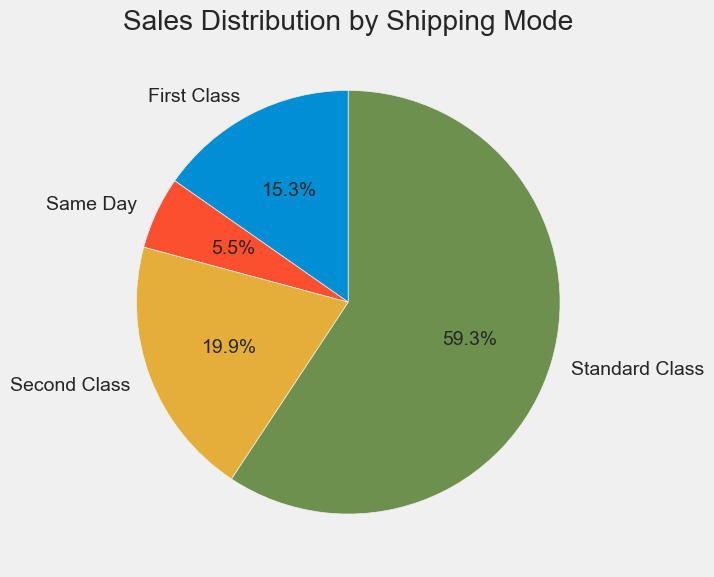

In [99]:
# Shipping mode visualization
plt.figure(figsize=(10, 6))
shipping_analysis['Sales'].plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Shipping Mode')
plt.ylabel('')
plt.tight_layout()
plt.show()


### 10. Advanced Analysis: RFM (Recency, Frequency, Monetary)

In [104]:
# Calculate RFM metrics
current_date = sales['Order Date'].max() + pd.Timedelta(days=1)

rfm = sales.groupby('Customer ID').agg({
    'Order Date': lambda x: (current_date - x.max()).days,  # Recency
    'Order ID': 'count',  # Frequency
    'Sales': 'sum'  # Monetary
}).rename(columns={
    'Order Date': 'Recency',
    'Order ID': 'Frequency',
    'Sales': 'Monetary'
})

In [106]:
# Create RFM segments
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [108]:
# Segment customers
segment_map = {
    r'111|112|121|131|141|151': 'Lost',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating',
    r'311|411|331|421|412|311|321': 'At Risk',
    r'433|434|443|444|334|343|344|244|234|243|144': 'Loyal',
    r'533|544|552|553|551|542|541|532|531|452|451|442|441|431|453|425|424|413': 'Champions'
}

rfm['Segment'] = rfm['RFM_Score'].replace(segment_map, regex=True)
rfm['Segment'] = rfm['Segment'].fillna('Potential')


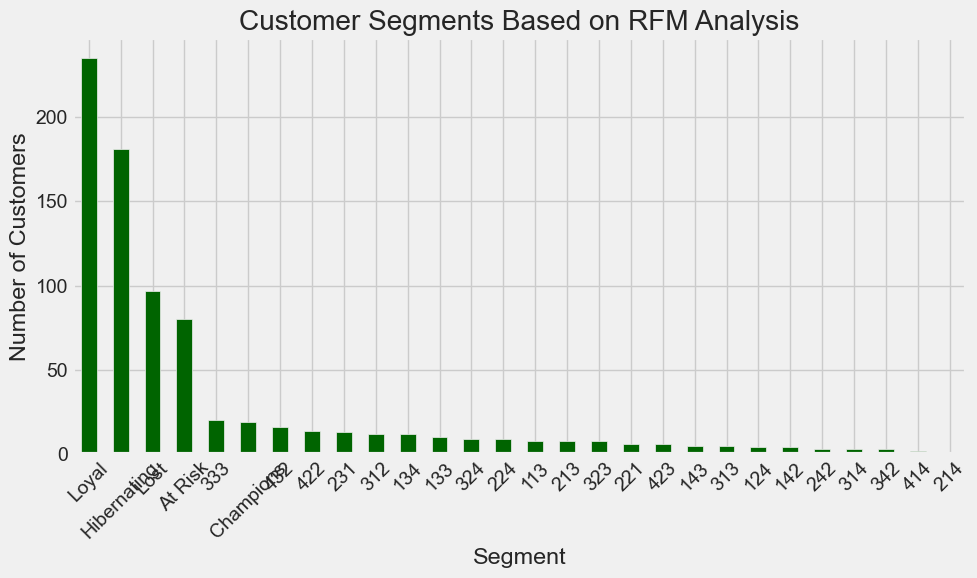

In [110]:
# RFM segment visualization
plt.figure(figsize=(10, 6))
rfm['Segment'].value_counts().plot(kind='bar', color='darkgreen')
plt.title('Customer Segments Based on RFM Analysis')
plt.ylabel('Number of Customers')
plt.xlabel('Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 11. Correlation Analysis

In [112]:
# Create a correlation matrix (for numerical columns)
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

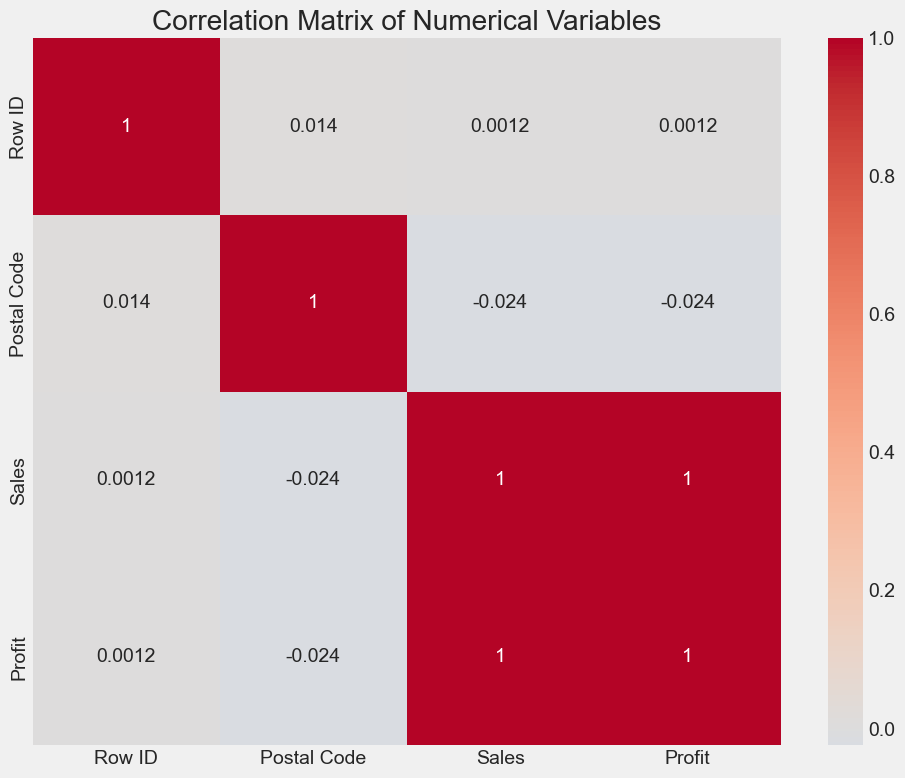

In [114]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()


### 12. Key Insights and Recommendations

In [116]:
# Calculate key metrics
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_order_value = df['Sales'].mean()
top_product = top_products.index[0]
top_category = category_sales.index[0]
top_state = state_sales.index[0]
top_city = city_sales.index[0]
best_segment = segment_analysis['Profit'].idxmax()


In [118]:
# Display insights
print("\n=== KEY INSIGHTS ===")
print(f"1. Total Sales: ${total_sales:,.2f}")
print(f"2. Total Profit: ${total_profit:,.2f}")
print(f"3. Average Order Value: ${avg_order_value:,.2f}")
print(f"4. Top Selling Product: {top_product}")
print(f"5. Top Performing Category: {top_category}")
print(f"6. Top State by Sales: {top_state}")
print(f"7. Top City by Sales: {top_city}")
print(f"8. Most Profitable Customer Segment: {best_segment}")


=== KEY INSIGHTS ===
1. Total Sales: $2,261,536.78
2. Total Profit: $452,307.36
3. Average Order Value: $230.77
4. Top Selling Product: Canon imageCLASS 2200 Advanced Copier
5. Top Performing Category: Technology
6. Top State by Sales: California
7. Top City by Sales: New York City
8. Most Profitable Customer Segment: Consumer


In [119]:
# Recommendations
print("\n=== RECOMMENDATIONS ===")
print("1. Focus marketing efforts on the top performing categories and products.")
print("2. Increase inventory for high-demand products in top cities and states.")
print("3. Develop targeted campaigns for the most profitable customer segments.")
print("4. Optimize shipping methods to reduce costs and improve profitability.")
print("5. Implement loyalty programs for 'Champions' identified in RFM analysis.")
print("6. Consider promotions during low-sales months to balance seasonal demand.")


=== RECOMMENDATIONS ===
1. Focus marketing efforts on the top performing categories and products.
2. Increase inventory for high-demand products in top cities and states.
3. Develop targeted campaigns for the most profitable customer segments.
4. Optimize shipping methods to reduce costs and improve profitability.
5. Implement loyalty programs for 'Champions' identified in RFM analysis.
6. Consider promotions during low-sales months to balance seasonal demand.


### 13. Exporting Results

In [120]:
# Save cleaned data
df.to_csv('Cleaned_Sales_Data.csv', index=False)

# Save key metrics to a separate file
key_metrics = pd.DataFrame({
    'Metric': ['Total Sales', 'Total Profit', 'Average Order Value', 
               'Top Product', 'Top Category', 'Top State', 'Top City', 
               'Best Customer Segment'],
    'Value': [total_sales, total_profit, avg_order_value, 
              top_product, top_category, top_state, top_city, best_segment]
})
key_metrics.to_csv('Sales_Key_Metrics.csv', index=False)

print("\nAnalysis completed and results exported successfully!")


Analysis completed and results exported successfully!
